In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df = data.dropna(axis=1)

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [7]:
df.diagnosis = le.fit_transform(df.diagnosis)

C:\Users\Amin\Anaconda3\lib\site-packages\pandas\core\generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [8]:
df.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

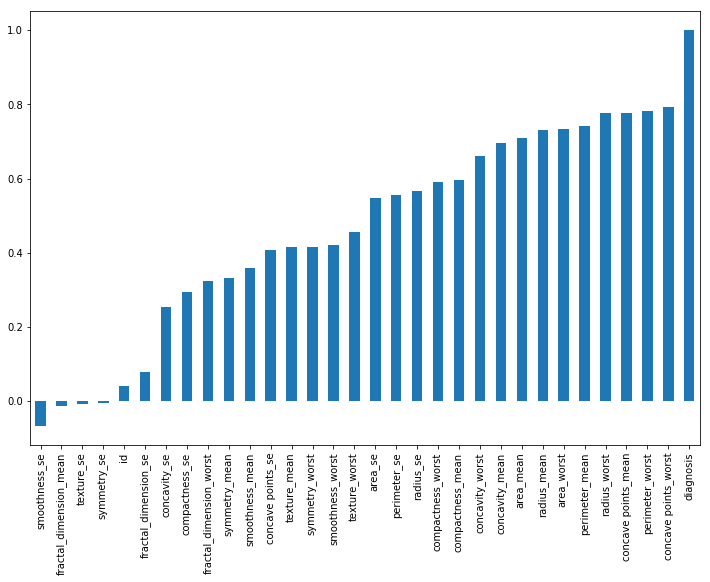

In [9]:
plt.figure(figsize = (12, 8))
df.corr()['diagnosis'].sort_values().plot(kind = 'bar')

In [10]:
df1 = df.sample(frac=1)

In [11]:
features=[feature for feature in df1.columns if feature not in ['diagnosis','id']]

In [12]:
features

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [13]:
Q1 = df1[features].quantile(0.25)
Q3 = df1[features].quantile(0.75)
IQR = Q3 - Q1

In [14]:
IQR

radius_mean                  4.080000
texture_mean                 5.630000
perimeter_mean              28.930000
area_mean                  362.400000
smoothness_mean              0.018930
compactness_mean             0.065480
concavity_mean               0.101140
concave points_mean          0.053690
symmetry_mean                0.033800
fractal_dimension_mean       0.008420
radius_se                    0.246500
texture_se                   0.640100
perimeter_se                 1.751000
area_se                     27.340000
smoothness_se                0.002977
compactness_se               0.019370
concavity_se                 0.026960
concave points_se            0.007072
symmetry_se                  0.008320
fractal_dimension_se         0.002310
radius_worst                 5.780000
texture_worst                8.640000
perimeter_worst             41.290000
area_worst                 568.700000
smoothness_worst             0.029400
compactness_worst            0.191900
concavity_wo

In [15]:
df1 = df1[~((df1<(Q1-1.5*IQR))|(df1>(Q3+1.5*IQR))).any(axis=1)]
print("No. of rows remaining: ", df1.shape[0])

No. of rows remaining:  398


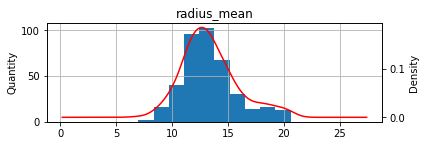

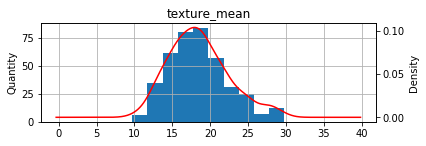

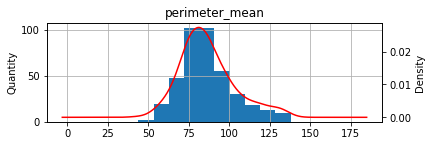

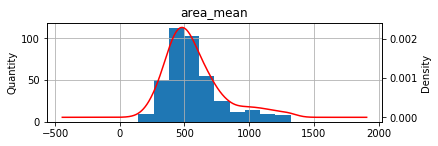

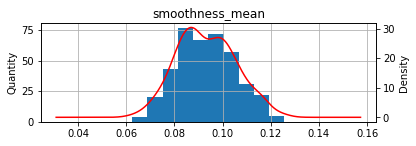

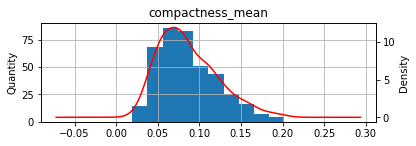

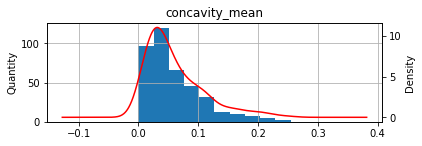

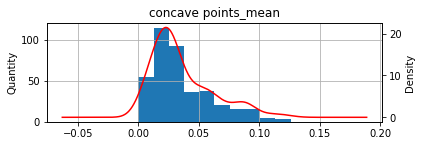

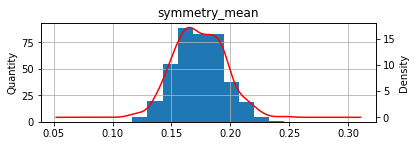

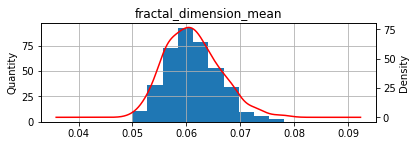

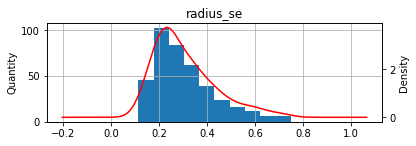

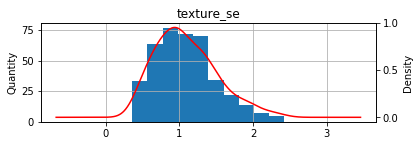

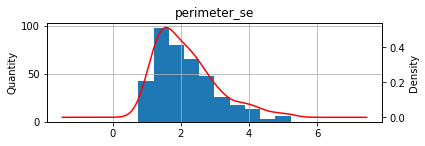

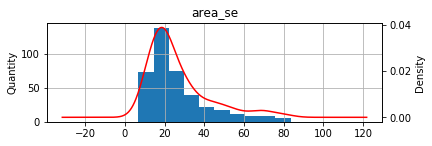

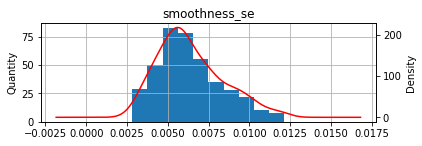

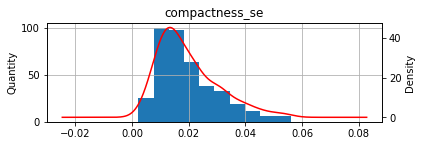

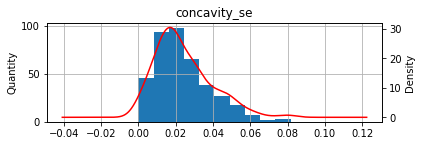

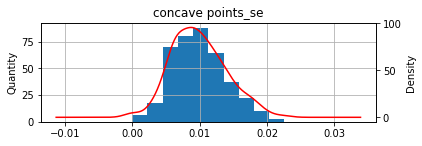

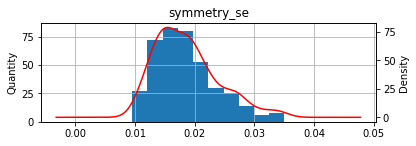

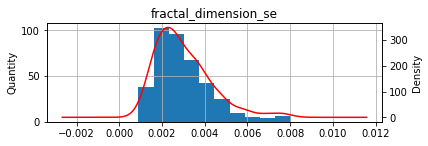

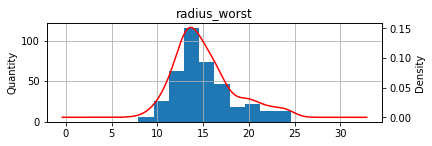

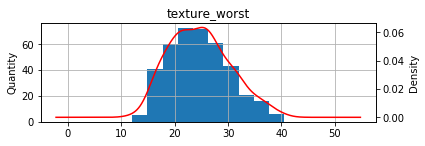

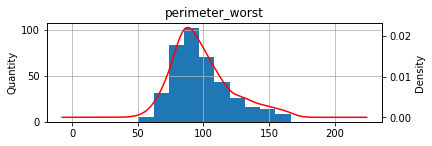

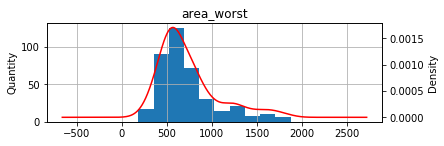

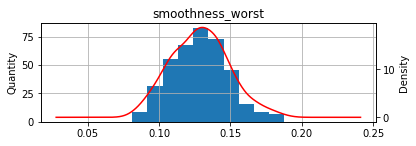

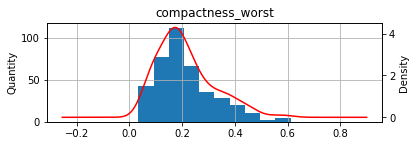

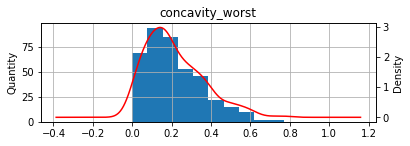

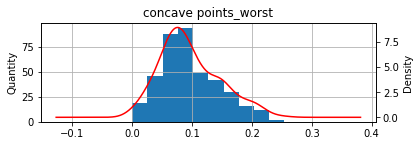

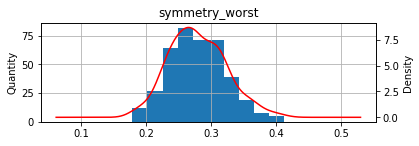

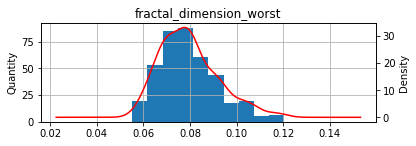

In [16]:
for feature in features:
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    ax2 = ax1.twinx()
    plt.title(feature)
    #plt.ylabel = 'Quantity'
    df1[feature].hist(ax =ax1)
    
    df1[feature].plot.kde(ax=ax2, color = 'red')
    ax1.set_ylabel('Quantity')
    plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [18]:
sc = StandardScaler()

In [19]:
y = df1['diagnosis']
x = df1[features]

In [20]:
x_scaled_sc = pd.DataFrame(sc.fit_transform(x),columns=df1[features].columns)

In [21]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test = train_test_split(x_scaled_sc,y,test_size=0.2,random_state=0)

In [22]:
x_train.shape

(318, 30)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

C:\Users\Amin\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [24]:
rf = RandomForestClassifier()
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [7,8,9,10],
    'criterion' :['gini', 'entropy']
}
rf_cv = GridSearchCV(rf,param_grid,scoring='accuracy',cv=5)

In [25]:
rf_cv.fit(x_train, y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [7, 8, 9, 10], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [26]:
rf_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 200}

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
rf_cv.predict(x_test)

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [43]:
rf_cv_pred = rf_cv.predict(x_test)
rf_cv_score = accuracy_score(rf_cv_pred,y_test)
print('Random Forest Accuracy Score:',rf_cv_score)

Random Forest Accuracy Score: 0.925


In [30]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
visible = Input(shape=(30,))

hidden1 = Dense(50, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())
#plot_model(model, to_file='multilayer_perceptron_graph.png')
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

Using TensorFlow backend.





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                1550      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 2,591
Trainable params: 2,591
Non-trainable params: 0
_________________________________________________________________
None


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [31]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

In [32]:
model.fit(x = x_train, y = y_train, epochs = 400, validation_data = (x_test, y_test),callbacks = [early_stop])




Train on 318 samples, validate on 80 samples
Epoch 1/400





318/318 [==============================] - 0s 1ms/step - loss: 0.5435 - val_loss: 0.4296
Epoch 2/400
318/318 [==============================] - 0s 72us/step - loss: 0.3865 - val_loss: 0.3176
Epoch 3/400
318/318 [==============================] - 0s 107us/step - loss: 0.2930 - val_loss: 0.2522
Epoch 4/400
318/318 [==============================] - 0s 76us/step - loss: 0.2329 - val_loss: 0.2113
Epoch 5/400
318/318 [==============================] - 0s 94us/step - loss: 0.1911 - val_loss: 0.1845
Epoch 6/400
318/318 [==============================] - 0s 98us/step - loss: 0.1600 - val_loss: 0.1696
Epoch 7/400
318/318 [==============================] - 0s 88us/step - loss: 0.1393 - val_loss: 0.1533
Epoch 8/400
318/318 [==============================] - 0s 94us/step - loss: 0.1218 - val_loss: 0.1451
Epoch 9/400
318/318 [==============================] - 0s 104us/step - loss: 0.1097 - val_loss: 0.1357
Epoch 10/400
318/318 [======

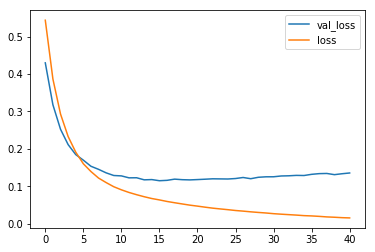

In [33]:
model_loss = pd.DataFrame(model.history.history)

model_loss.plot()

In [34]:
predictions = (model.predict(x_test) > 0.5).astype("int32")

In [35]:
predictions

array([[1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0]])

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.98      0.95      0.97        63
          1       0.84      0.94      0.89        17

avg / total       0.95      0.95      0.95        80



In [38]:
print(confusion_matrix(y_test, predictions))

[[60  3]
 [ 1 16]]


In [39]:
nn_score = accuracy_score(predictions,y_test)

In [44]:
print('Neural Networks Accuracy Score',nn_score)

Neural Networks Accuracy Score 0.95
